In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [45]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
def visualize(original, augmented):
    # fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    
    plt.imshow(augmented)
    flipped = tf.image.flip_left_right(original)
    visualize(original, flipped)

In [11]:
import tensorflow_datasets as tfds
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
     split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
     with_info=True,
     as_supervised=True,)
print(val_ds.get_single_element)
# train_ds = train_ds.shuffle(1000).map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

<bound method DatasetV2.get_single_element of <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>>


In [26]:
import os
from PIL.PngImagePlugin import Image
check = os.path.isfile('datasetJPEG\\0vzkrpTuBC8.jpeg')
path = 'datasetJPEG\\0vzkrpTuBC8.jpeg'
# print(check)
# path = os.path.join('/dataset/0vzkrpTuBC8.png')
# print(path)
image = Image.open(path)
image.show()
image_tensor = tf.convert_to_tensor(image)
print(image_tensor)
# Load_image = tf.keras.preprocessing.image.load_img(path)
# print(tf.convert_to_tensor(Load_image))
# visualize(Load_image,Load_image)

ValueError: Attempt to convert a value (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x24BDC031210>) with an unsupported type (<class 'PIL.JpegImagePlugin.JpegImageFile'>) to a Tensor.

In [2]:
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = 'dataset\_k1pDi4AjG8.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print (vgg16_feature.shape)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [7]:
vgg16_feature

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ..., 41.472427  ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [43]:
print(10%5)

0


In [69]:
from tensorflow.keras.models import Model
import os

image_features = {}
model_vgg16 = VGG16()
model_vgg16 = Model(inputs=model_vgg16.inputs,outputs = model_vgg16.layers[-2].output)
model_vgg16.summary()
vgg16_feature_list = []
file = 'dataset-v2\*.png'
ls = []
# for filename in os.listdir('dataset'):
#     ls.append(filename)
count = 0
for i, filename  in enumerate(os.listdir('dataset-v2')):

    
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset-v2\\'+filename, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model_vgg16.predict(img_data)
    image_features[filename] = vgg16_feature
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [45]:
print(image_features['6AN1AifVyds.png'])

KeyError: '6AN1AifVyds.png'

In [46]:
img = image.load_img('dataset\_0VnLoJqbA0.png', target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature = model_vgg16.predict(img_data)
print(vgg16_feature)    

1/1 [==============================] - 0s 15ms/step
[[0.        0.        0.        ... 0.        0.        3.2573488]]


In [47]:
img = image.load_img('dataset\_2uj8NyqxEA.png', target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature = model_vgg16.predict(img_data)
print(vgg16_feature)

1/1 [==============================] - 0s 17ms/step
[[0.        0.        0.        ... 0.        0.8799702 1.090927 ]]


In [48]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=15, random_state=0).fit(vgg16_feature_list)




c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
clusters = kmeans.fit_predict(vgg16_feature_list)
len(clusters)

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


166

In [50]:
dic = {}
for i in clusters:
    if i not in dic:
        dic[i]=1
    else:
        dic[i] = dic[i]+1 

print(sorted(dic.items()))

[(0, 1), (1, 6), (2, 27), (3, 4), (4, 14), (5, 12), (6, 28), (7, 7), (8, 1), (9, 57), (10, 2), (11, 1), (12, 4), (13, 1), (14, 1)]


In [51]:
vgg16_feature_list

[array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.24252757], dtype=float32),
 array([0.49432305, 0.        , 0.        , ..., 0.        , 4.556128  ,
        0.4771725 ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.       , 0.3976026, 0.       , ..., 0.       , 0.       ,
        3.1359198], dtype=float32),
 array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 4.379205],
       dtype=float32),
 array([0.        , 0.23089269, 0.        , ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 array([0.       , 0.8962673, 0.       , ..., 0.       , 1.1257532,
        1.7264805], dtype=float32),
 array([0.8781959, 1.0132655, 0.       , ..., 0.       , 1.911797 ,
        0.       ], dtype=float32),
 array([0.       , 2.4204097, 0.       , ..., 0.       , 0.4321577,
        3.0504863], dtype=float32),
 array([0.       , 0.       , 3.105826 , ..., 0.       , 0.5384433,
        1.7959154], dtype=float32),

In [52]:
print(model_vgg16.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:

print(len(vgg16_feature_list[200]))
for i in vgg16_feature_list[200]:
    if(i != 0):
        print(i)

IndexError: list index out of range

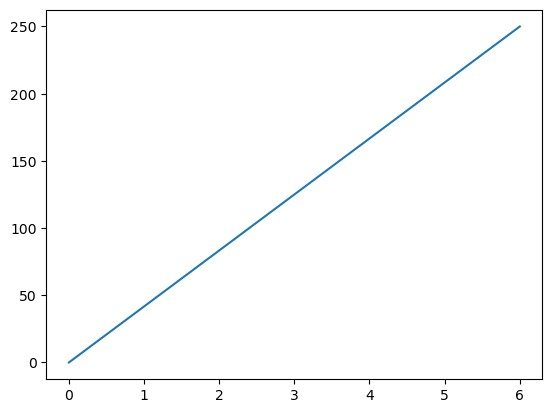

In [54]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()

In [55]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])
my_dataset = CustomDataSet('/Users/tanishsurana/Desktop/mlpcw7/mlp-project/dataset/', transform=transform)
dataloader = torch.utils.data.DataLoader(my_dataset , batch_size=15, shuffle=False, 
                               num_workers=0, drop_last=True)




NameError: name 'transforms' is not defined

In [71]:
features = np.array(vgg16_feature_list)
print(features.shape)

(831, 4096)


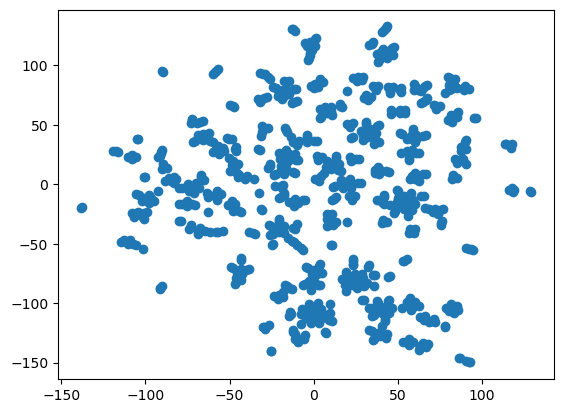

In [72]:
# model = torchvision.models.resnet18(pretrained=True)
# model.eval()
# features = []



# with torch.no_grad():
#     for _, images in enumerate(dataloader):
#         outputs = model(images)
#         features.append(outputs)
# features = torch.cat(features, dim=0)



from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



tsne = TSNE(n_components=2, perplexity=2, learning_rate=350, n_iter=5000, random_state=0).fit_transform(features)

plt.scatter(tsne[:, 0], tsne[:, 1])
plt.show()

In [73]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))


In [67]:
import torchvision.transforms as T
images = []
transform = T.ToPILImage()

for label, img in enumerate(dataloader):
    bs = img.shape[0]
    for i in range(bs):
        temp = transform(img[i])
        images.append(temp)


ModuleNotFoundError: No module named 'torchvision'

0 -1gyxuGDs1U.png
1 -4zrvLIvs4c.png
2 -AkTLfreP2M.png
3 -c0e7821tHs.png
4 -fDVHJoZArg.png
5 -Jl2Hc2DTKc.png
6 -ldA6PCa1kM.png
7 -LqbAMHGMTk.png
8 -nd7n0gqAmI.png
9 -O9qlFkYMPg.png
10 -QTo3nfmWUc.png
11 -S4CwK5Z5Xg.png
12 -T-nJ2Wpw7k.png
13 -TfgtjrXCHk.png
14 -Xb6JoucBXM.png
15 -xBAM1TRSKA.png
16 -xl0Com4ElM.png
17 -ZgukO7zXPw.png
18 -_I4hECDZ_E.png
19 0573pkeSWeE.png
20 0BT0wtCFg7g.png
21 0DEeNLbFuRc.png
22 0DPwPc0_D4Y.png
23 0fo8z8AYY8I.png
24 0nLoRgi1f78.png
25 0Nnu3YnYvxQ.png
26 0nsgnqskJHY.png
27 0NXvJ2rLmbo.png
28 0PJeUvSlH0Y.png
29 0VIlQrx-MJA.png
30 0vzkrpTuBC8.png
31 0Y5YY0qC76A.png
32 0ZsSCFAJUvQ.png
33 1-heRW4pZGE.png
34 17kOSu0fhD8.png
35 1atCTSRJHH0.png
36 1h1n6uOZCQM.png
37 1ILEFmneqJA.png
38 1jdee9lHNiU.png
39 1Kk_etwM2RY.png
40 1KoQPLMR_ws.png
41 1kzAID_adzY.png
42 1N7L1njglgY.png
43 1p0zaHCyYyg.png
44 1PLZBbrLJKA.png
45 1S-YJI2YB1s.png
46 1uLDWf6jM-c.png
47 1zUvUDCkPE8.png
48 23b-uwda5tQ.png
49 24kZ0uGGM48.png
50 28hxSU4mxbw.png
51 29w88_gzf9Q.png
52 2Ahhjo0Knm0.png
53 

C:\Users\rawal\AppData\Local\Temp\ipykernel_2484\2472547274.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


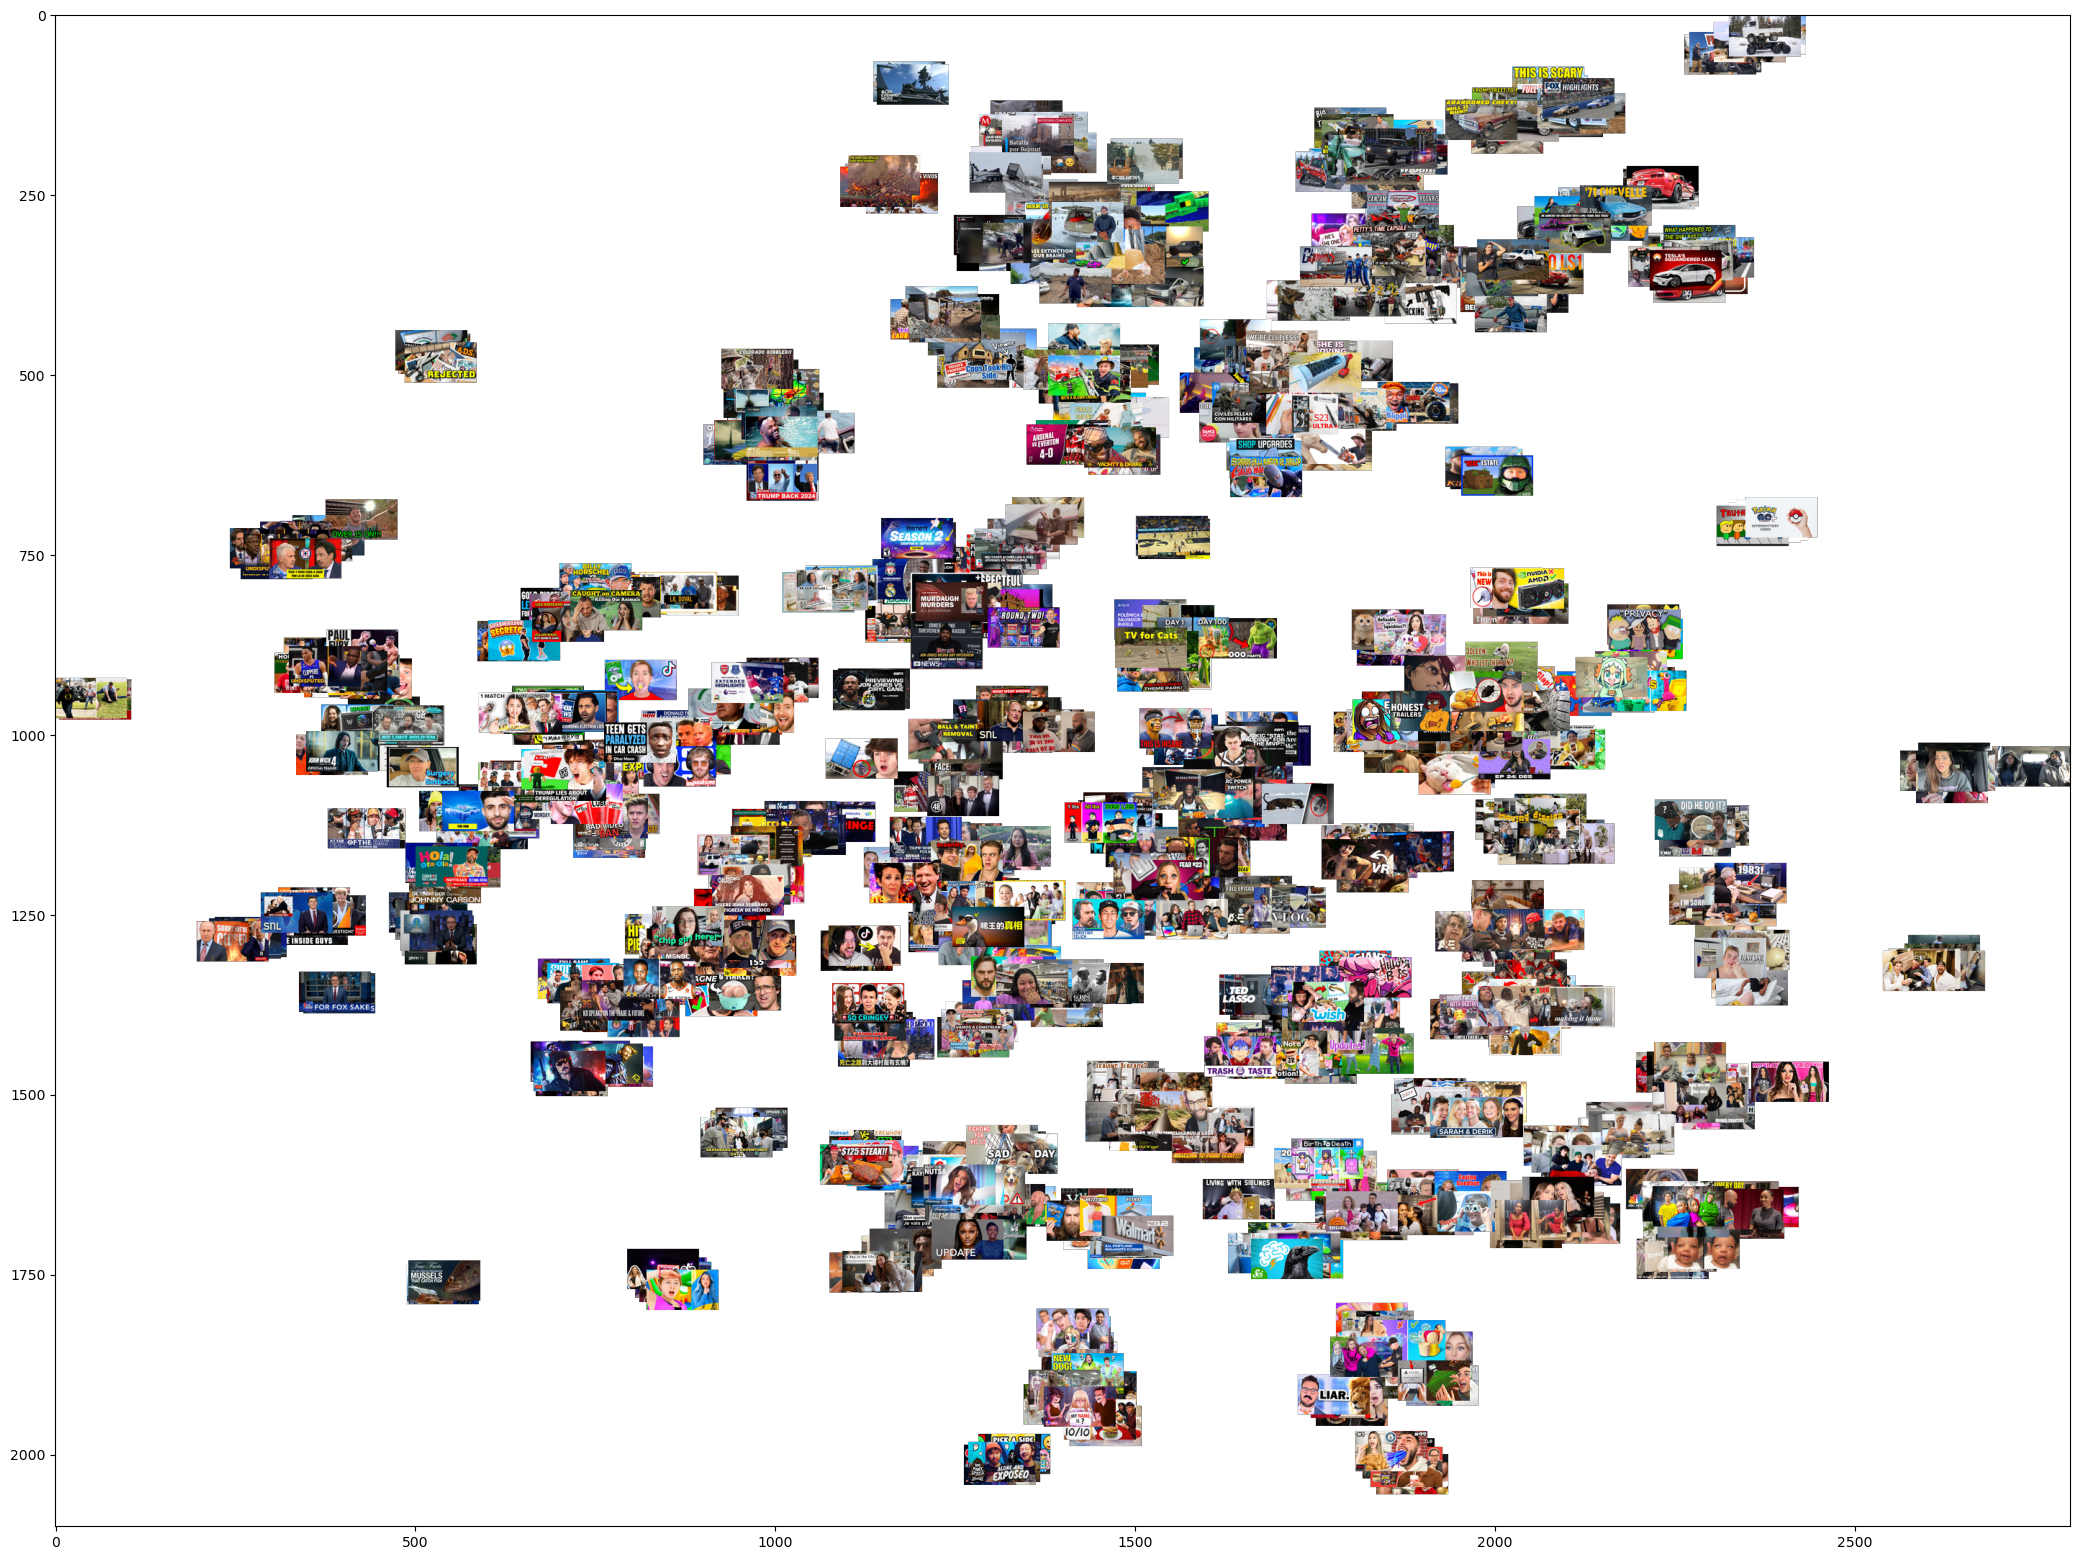

In [77]:
r = 0.7
from PIL import Image

width = int(4000*r)
height = int(3000*r)
max_dim = 100
images = []
for i, filename  in enumerate(os.listdir('dataset-v2')):
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset-v2\\'+filename)
    images.append(img)
full_image = Image.new('RGBA', (width, height))


for img, x, y in zip(images, tx, ty):
    tile = img
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (26,26))
plt.imshow(full_image)

In [79]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=15, random_state=0).fit(vgg16_feature_list)



c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[  56.91194 -130.29932]


c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


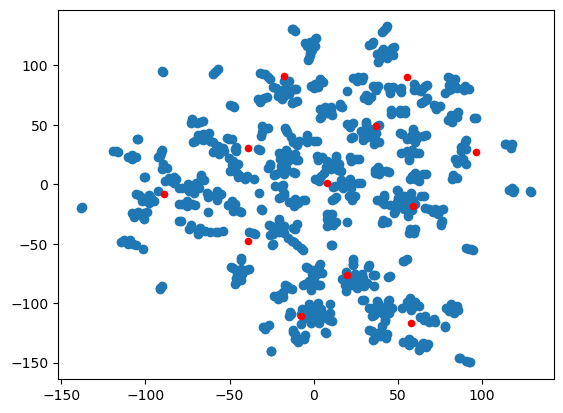

In [108]:
# print(kmeans.labels_)
print(tsne[0])
kmeans = KMeans(n_clusters=12,random_state=0).fit(tsne)
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=20,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [120]:
import pandas as pd
data = []
labels = kmeans.labels_
for i in range(0,len(tsne)):
    x = tsne[i][0]
    y = tsne[i][1]
    pred = labels[i]
    data.append(
        {
            'X' : x,
            'Y' : y,
            'Cluster' : pred
        }
    )
print(data)
df = pd.DataFrame(data)
df.head(10)

[{'X': 56.91194, 'Y': -130.29932, 'Cluster': 5}, {'X': 38.934097, 'Y': -106.15772, 'Cluster': 5}, {'X': -108.035065, 'Y': 24.907892, 'Cluster': 3}, {'X': -14.042911, 'Y': 22.669657, 'Cluster': 0}, {'X': 42.25394, 'Y': -103.39328, 'Cluster': 5}, {'X': 53.660248, 'Y': -9.625532, 'Cluster': 1}, {'X': 42.123783, 'Y': -10.418933, 'Cluster': 1}, {'X': 43.78589, 'Y': 132.7218, 'Cluster': 4}, {'X': -6.4861507, 'Y': -84.42832, 'Cluster': 2}, {'X': 21.040861, 'Y': -81.08527, 'Cluster': 11}, {'X': 2.4463694, 'Y': -100.190895, 'Cluster': 2}, {'X': -7.3550215, 'Y': -117.2824, 'Cluster': 2}, {'X': 10.668161, 'Y': 12.856982, 'Cluster': 10}, {'X': -32.905537, 'Y': 30.01914, 'Cluster': 0}, {'X': 21.908834, 'Y': 22.75722, 'Cluster': 10}, {'X': 76.24083, 'Y': -31.178312, 'Cluster': 1}, {'X': 60.55781, 'Y': 9.08572, 'Cluster': 1}, {'X': 2.4742136, 'Y': 20.591076, 'Cluster': 10}, {'X': 45.840027, 'Y': 80.80341, 'Cluster': 4}, {'X': 79.70451, 'Y': 53.883156, 'Cluster': 8}, {'X': -57.935833, 'Y': -9.411203, 

,X,Y,Cluster
0,56.911942,-130.299316,5
1,38.934097,-106.157722,5
2,-108.035065,24.907892,3
3,-14.042911,22.669657,0
4,42.253941,-103.393280,5
5,53.660248,-9.625532,1
6,42.123783,-10.418933,1
7,43.785889,132.721802,4
8,-6.486151,-84.428322,2
9,21.040861,-81.085274,11


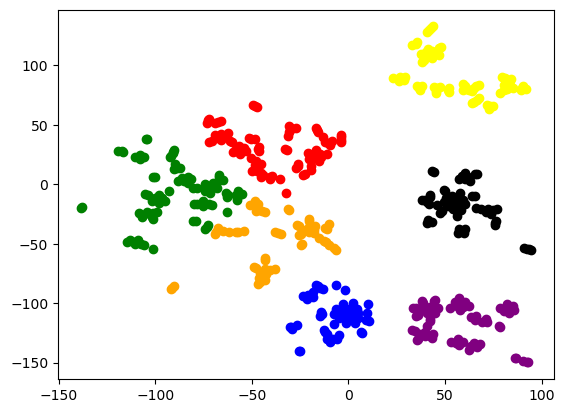

In [133]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label_0 = df.loc[df['Cluster'] == 0]
filtered_label_1 = df.loc[df['Cluster'] == 1]
filtered_label_2 = df.loc[df['Cluster'] == 2]
filtered_label_3 = df.loc[df['Cluster'] == 3]
filtered_label_4 = df.loc[df['Cluster'] == 4]
filtered_label_5 = df.loc[df['Cluster'] == 5]
filtered_label_6 = df.loc[df['Cluster'] == 6]
filtered_label_7 = df.loc[df['Cluster'] == 7]
# filtered_label_0.head(10)
#plotting the results
plt.scatter(filtered_label_0['X'] , filtered_label_0['Y'], color ='red')
plt.scatter(filtered_label_1['X'] , filtered_label_1['Y'], color ='black')
plt.scatter(filtered_label_2['X'] , filtered_label_2['Y'], color ='blue')
plt.scatter(filtered_label_3['X'] , filtered_label_3['Y'], color ='green')
plt.scatter(filtered_label_4['X'] , filtered_label_4['Y'], color ='yellow')
plt.scatter(filtered_label_5['X'] , filtered_label_5['Y'], color ='purple')
plt.scatter(filtered_label_6['X'] , filtered_label_6['Y'], color ='orange')
plt.show()